In [160]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [2]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [3]:
businesses.describe()

,business_id,latitude,longitude,business_certificate
count,7544.000000,4622.000000,4622.000000,6.325000e+03
mean,45598.628314,37.643185,-122.001268,4.993254e+05
std,33127.061603,2.218984,7.191391,2.740166e+05
min,10.000000,0.000000,-122.510896,6.710000e+02
25%,6051.250000,37.760521,-122.435961,3.676290e+05
50%,62572.500000,37.780919,-122.418536,4.510140e+05
75%,76842.500000,37.790130,-122.406553,4.855150e+05
max,87213.000000,37.875937,0.000000,7.451600e+06


In [4]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 16 columns):
business_id             7544 non-null int64
name                    7542 non-null object
address                 7544 non-null object
city                    5778 non-null object
postal_code             7248 non-null object
latitude                4622 non-null float64
longitude               4622 non-null float64
phone_number            2173 non-null object
TaxCode                 7536 non-null object
business_certificate    6325 non-null float64
application_date        5635 non-null object
owner_name              7536 non-null object
owner_address           7522 non-null object
owner_city              7506 non-null object
owner_state             7507 non-null object
owner_zip               7480 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 943.1+ KB


In [5]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [6]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27285 entries, 0 to 27284
Data columns (total 4 columns):
business_id    27285 non-null int64
Score          15263 non-null float64
date           27285 non-null int64
type           27285 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 852.7+ KB


In [167]:
inspections[inspections.Score.isnull()].head()

,business_id,Score,date,type,month
0,10,NaN,20140807,Reinspection/Followup,08
2,10,NaN,20140124,Reinspection/Followup,01
14,45,NaN,20151230,Non-inspection site visit,12
19,50,NaN,20150513,Non-inspection site visit,05
22,50,NaN,20130409,Reinspection/Followup,04


In [59]:
inspections[inspections.business_id == 19]

,business_id,Score,date,type
4,19,94.0,20141110,Routine - Unscheduled
5,19,94.0,20140214,Routine - Unscheduled
6,19,96.0,20130904,Routine - Unscheduled


In [8]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [9]:
violations[violations.business_id == 19]

,business_id,date,ViolationTypeID,risk_category,description
5,19,20140214,103156,Low Risk,Permit license or inspection report not posted
6,19,20140214,103124,Moderate Risk,Inadequately cleaned or sanitized food contact...
7,19,20141110,103145,Low Risk,Improper storage of equipment utensils or linens
8,19,20141110,103116,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19,20130904,103133,Moderate Risk,Foods not protected from contamination


In [10]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39720 entries, 0 to 39719
Data columns (total 5 columns):
business_id        39720 non-null int64
date               39720 non-null int64
ViolationTypeID    39720 non-null int64
risk_category      39710 non-null object
description        39710 non-null object
dtypes: int64(3), object(2)
memory usage: 1.5+ MB


In [11]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [94]:
temp_table = pd.merge(inspections, violations, on=['business_id','date'])

In [74]:
temp_table[temp_table.business_id == 19]

,business_id,Score,date,type,ViolationTypeID,risk_category,description
7,19.0,94.0,20141110.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens
8,19.0,94.0,20141110.0,Routine - Unscheduled,103116.0,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19.0,94.0,20140214.0,Routine - Unscheduled,103156.0,Low Risk,Permit license or inspection report not posted
10,19.0,94.0,20140214.0,Routine - Unscheduled,103124.0,Moderate Risk,Inadequately cleaned or sanitized food contact...
11,19.0,96.0,20130904.0,Routine - Unscheduled,103133.0,Moderate Risk,Foods not protected from contamination


In [95]:
temp_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43850 entries, 0 to 43849
Data columns (total 7 columns):
business_id        43850 non-null int64
Score              38656 non-null float64
date               43850 non-null int64
type               43850 non-null object
ViolationTypeID    43850 non-null int64
risk_category      43838 non-null object
description        43838 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [96]:
restaurant_scores = pd.merge(businesses, temp_table, how = 'outer', on='business_id')

In [97]:
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water
1,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
2,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings
3,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...
4,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens


In [98]:
restaurant_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46464 entries, 0 to 46463
Data columns (total 22 columns):
business_id             46464 non-null float64
name                    46301 non-null object
address                 46303 non-null object
city                    39506 non-null object
postal_code             45204 non-null object
latitude                34537 non-null float64
longitude               34537 non-null float64
phone_number            12847 non-null object
TaxCode                 46295 non-null object
business_certificate    40867 non-null float64
application_date        34088 non-null object
owner_name              46214 non-null object
owner_address           46164 non-null object
owner_city              46103 non-null object
owner_state             46098 non-null object
owner_zip               45992 non-null object
Score                   38715 non-null float64
date                    43914 non-null float64
type                    43914 non-null object
ViolationTy

In [12]:
# 2 Which ten business have had the most inspections?

In [112]:
restaurant_scores.groupby('name').type.count().sort_values(ascending = False).head(10)

name
Peet's Coffee & Tea          119
KENTUCKY FRIED CHICKEN        69
Lers Ros Thai Noodle          67
Whole Foods Market            66
Specialty's Cafe & Bakery     64
King of Thai Noodle House     64
Hakka Restaurant              63
Starbucks Coffee              60
Cafe Bakery                   59
Yama Sushi Restaurant         58
Name: type, dtype: int64

In [13]:
# 3 Group and count the inspections by type

In [113]:
restaurant_scores.groupby('type').type.count()

type
Complaint                           2006
Complaint Reinspection/Followup       12
Foodborne Illness Investigation      188
New Construction                      45
New Ownership                       1120
Non-inspection site visit            208
Reinspection/Followup               1178
Routine - Scheduled                   60
Routine - Unscheduled              39056
Structural Inspection                 41
Name: type, dtype: int64

In [14]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [157]:
inspections['month'] = inspections.date.apply(lambda x: str(x)[4:6])
inspections.head()

,business_id,Score,date,type,month
0,10,NaN,20140807,Reinspection/Followup,08
1,10,94.0,20140729,Routine - Unscheduled,07
2,10,NaN,20140124,Reinspection/Followup,01
3,10,92.0,20140114,Routine - Unscheduled,01
4,19,94.0,20141110,Routine - Unscheduled,11


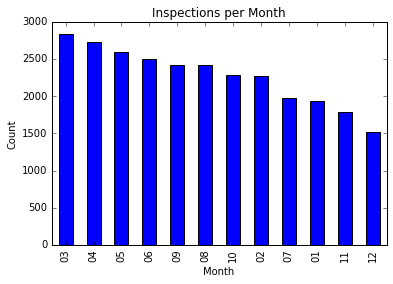

In [166]:
# drinks.continent.value_counts().plot(kind='bar', title='Countries per Continent')
# plt.xlabel('Continent')
# plt.ylabel('Count')
inspections.month.value_counts().plot(kind='bar', title = 'Inspections per Month')
plt.xlabel('Month')
plt.ylabel('Count')



In [15]:
# 5 Which zip code contains the most high risk violations?

In [16]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [17]:
# 7 Examining the descriptions, what is the most common violation?

In [18]:
# 8 Create a hist of the scores with 10 bins

In [19]:
# 9 Can you predict risk category based on the other features in this dataset?

In [20]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [21]:
############################
### A Little More Morbid ###
############################

In [22]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [23]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [24]:
# 2. Show the count of missing values in each column

In [25]:
# 3. replace each null value in the dataframe with the string "Unknown"

In [26]:
# 4. How many killings were there so far in 2015?

In [27]:
# 5. Of all killings, how many were male and how many female?

In [28]:
# 6. How many killings were of unarmed people?

In [29]:
# 7. What percentage of all killings were unarmed?

In [30]:
# 8. What are the 5 states with the most killings?

In [31]:
# 9. Show a value counts of deaths for each race

In [32]:
# 10. Display a histogram of ages of all killings

In [33]:
# 11. Show 6 histograms of ages by race

In [34]:
# 12. What is the average age of death by race?

In [35]:
# 13. Show a bar chart with counts of deaths every month

In [36]:
###################
### Less Morbid ###
###################

In [37]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [38]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

In [39]:
# 2. Show the cout of missing values in each column

In [40]:
# 3. What are the top 10 highest paying majors?

In [41]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

In [42]:
# 5. What is the average median salary for each major category?

In [43]:
# 6. Show only the top 5 paying major categories

In [44]:
# 7. Plot a histogram of the distribution of median salaries

In [45]:
# 8. Plot a histogram of the distribution of median salaries by major category

In [46]:
# 9. What are the top 10 most UNemployed majors?

In [47]:
# What are the unemployment rates?

In [48]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [49]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [50]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"